# OBSERVATIONS

### 1. The temperature correlates well with the latitude according to the graphical data. In the correlation, as the latitude moves away from the equator, the temperature also decreases.

### 2. Also I observed that there seems to be very little correation between the latitude and the wind speed (mph). The wind speed tends to increase when the temperature is colder compared to when it is warmer.

### 2. There seems to be no correlation between humidity and latitude. 


In [1]:
##!pip install citipy

In [1]:
# Dependencies and Setup
from citipy import citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
# from citipy import citipy

# Output File (CSV)
output_data_file = "Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Generate Cities List

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities[:5]

['nenjiang', 'viransehir', 'warrnambool', 'volga', 'rungata']

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + api_key
city1 = "cayenne"
api_url = url + "&q=" + city
output = requests.get(api_url).json()
output

{'coord': {'lon': -58.6502, 'lat': 51.226},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 13.96,
  'feels_like': 3.16,
  'temp_min': 13.96,
  'temp_max': 13.96,
  'pressure': 1013,
  'humidity': 92,
  'sea_level': 1013,
  'grnd_level': 1013},
 'visibility': 10000,
 'wind': {'speed': 9.17, 'deg': 312},
 'clouds': {'all': 21},
 'dt': 1613234190,
 'sys': {'country': 'CA', 'sunrise': 1613214679, 'sunset': 1613250390},
 'timezone': -14400,
 'id': 6137462,
 'name': 'Saint-Augustin',
 'cod': 200}

In [4]:
# Perform API calls
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name).

# Build query URL
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + api_key

# Set Counters
city_counter = 1
set_counter = 1

# Create a set of lists to hold the values for the weather check on each city using a series of successive API Calls.
cities_list = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Begin")

# Create a query url for each city in the cities list to get json response
for i, city in enumerate(cities):
    
    # Group cities as sets of 50s starting with 0
    if (i % 50 ==0 and i >= 50):
        set_counter = set_counter + 1
        city_counter = 1
        
    # Create API url for each city
    api_url = url + "&q=" + city
        
    # Get json response for each city
    response = requests.get(api_url).json()
        
    # Print the results
    print(f"Processing in Progess {city_counter} of set {set_counter} | {city}")
        
    # Increase city counter
    city_counter += 1
        
    # Add the values to the lists
    try:        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(city)
    except:
        print("City not found. Skipping...")

print("Completed")
        
    
        
        

Begin
Processing in Progess 1 of set 1 | nenjiang
Processing in Progess 2 of set 1 | viransehir
Processing in Progess 3 of set 1 | warrnambool
Processing in Progess 4 of set 1 | volga
Processing in Progess 5 of set 1 | rungata
City not found. Skipping...
Processing in Progess 6 of set 1 | waipawa
Processing in Progess 7 of set 1 | kungurtug
Processing in Progess 8 of set 1 | sibolga
Processing in Progess 9 of set 1 | rikitea
Processing in Progess 10 of set 1 | jamestown
Processing in Progess 11 of set 1 | severo-kurilsk
Processing in Progess 12 of set 1 | kamaishi
Processing in Progess 13 of set 1 | eyl
Processing in Progess 14 of set 1 | qaanaaq
Processing in Progess 15 of set 1 | busselton
Processing in Progess 16 of set 1 | ushuaia
Processing in Progess 17 of set 1 | fairbanks
Processing in Progess 18 of set 1 | hithadhoo
Processing in Progess 19 of set 1 | ancud
Processing in Progess 20 of set 1 | attawapiskat
City not found. Skipping...
Processing in Progess 21 of set 1 | chiang r

Processing in Progess 25 of set 4 | nishihara
Processing in Progess 26 of set 4 | manaus
Processing in Progess 27 of set 4 | kovernino
Processing in Progess 28 of set 4 | arman
Processing in Progess 29 of set 4 | faanui
Processing in Progess 30 of set 4 | ilulissat
Processing in Progess 31 of set 4 | eureka
Processing in Progess 32 of set 4 | buchanan
Processing in Progess 33 of set 4 | freeport
Processing in Progess 34 of set 4 | leningradskiy
Processing in Progess 35 of set 4 | xining
Processing in Progess 36 of set 4 | campoverde
Processing in Progess 37 of set 4 | beloha
Processing in Progess 38 of set 4 | vestmannaeyjar
Processing in Progess 39 of set 4 | zyryanovsk
Processing in Progess 40 of set 4 | san cristobal
Processing in Progess 41 of set 4 | yumen
Processing in Progess 42 of set 4 | berlevag
Processing in Progess 43 of set 4 | marawi
Processing in Progess 44 of set 4 | arlit
Processing in Progess 45 of set 4 | bengkulu
Processing in Progess 46 of set 4 | east london
Proce

Processing in Progess 49 of set 7 | honggang
Processing in Progess 50 of set 7 | phangnga
Processing in Progess 1 of set 8 | gat
Processing in Progess 2 of set 8 | bandarbeyla
Processing in Progess 3 of set 8 | dong hoi
Processing in Progess 4 of set 8 | kodiak
Processing in Progess 5 of set 8 | boa vista
Processing in Progess 6 of set 8 | utiroa
City not found. Skipping...
Processing in Progess 7 of set 8 | cruzeiro do sul
Processing in Progess 8 of set 8 | arandis
Processing in Progess 9 of set 8 | kosh-agach
Processing in Progess 10 of set 8 | nouadhibou
Processing in Progess 11 of set 8 | sharlyk
Processing in Progess 12 of set 8 | san isidro
Processing in Progess 13 of set 8 | alice springs
Processing in Progess 14 of set 8 | yar-sale
Processing in Progess 15 of set 8 | tiksi
Processing in Progess 16 of set 8 | saint anthony
Processing in Progess 17 of set 8 | nemuro
Processing in Progess 18 of set 8 | mrirt
City not found. Skipping...
Processing in Progess 19 of set 8 | saleaula


Processing in Progess 25 of set 11 | biskamzha
Processing in Progess 26 of set 11 | asarganj
Processing in Progess 27 of set 11 | lashio
Processing in Progess 28 of set 11 | aguadulce
Processing in Progess 29 of set 11 | kenai
Processing in Progess 30 of set 11 | ugoofaaru
Processing in Progess 31 of set 11 | salalah
Processing in Progess 32 of set 11 | solnechnyy
Processing in Progess 33 of set 11 | wajima
Processing in Progess 34 of set 11 | bima
Processing in Progess 35 of set 11 | kibaya
Processing in Progess 36 of set 11 | kutum
Processing in Progess 37 of set 11 | batagay-alyta
Processing in Progess 38 of set 11 | oxford
Processing in Progess 39 of set 11 | iranshahr
Processing in Progess 40 of set 11 | huanren
Processing in Progess 41 of set 11 | raudeberg
Processing in Progess 42 of set 11 | abatskoye
Processing in Progess 43 of set 11 | barra do garcas
Processing in Progess 44 of set 11 | la palma
Processing in Progess 45 of set 11 | hammerfest
Processing in Progess 46 of set 

In [5]:
len(cloudiness)

558

In [6]:
#Convert Raw Data to DataFrame

# Export the city data into a .csv.
# Display the DataFrame

# Place the weather data into a dictonary before exporting it to csv
weather_data_dict = {
    "City": cities_list,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": lat,
    "Longtitude": lng,
    "Maximum Temperature": max_temp,
    "Wind Speed": wind_speed
}

# Create a dataframe and keep the count of each variables in the column
weather_df = pd.DataFrame(weather_data_dict)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longtitude,Maximum Temperature,Wind Speed
0,nenjiang,0,CN,1613234190,86,49.1833,125.2167,-5.33,7.70
1,viransehir,44,TR,1613234190,63,37.2353,39.7631,53.22,2.98
2,warrnambool,14,AU,1613234190,82,-38.3833,142.4833,54.84,5.37
3,volga,100,RU,1613234191,95,57.9516,38.3879,7.02,13.22
4,waipawa,20,NZ,1613234191,82,-41.4122,175.5153,62.01,19.57


In [7]:
# Display the dataframe
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longtitude,Maximum Temperature,Wind Speed
0,nenjiang,0,CN,1613234190,86,49.1833,125.2167,-5.33,7.70
1,viransehir,44,TR,1613234190,63,37.2353,39.7631,53.22,2.98
2,warrnambool,14,AU,1613234190,82,-38.3833,142.4833,54.84,5.37
3,volga,100,RU,1613234191,95,57.9516,38.3879,7.02,13.22
4,waipawa,20,NZ,1613234191,82,-41.4122,175.5153,62.01,19.57


## The first requirement is to create a series of scatter plots to showcase the following relationships:

#### Temperature (F) vs. Latitude
#### Humidity (%) vs. Latitude
#### Cloudiness (%) vs. Latitude
#### Wind Speed (mph) vs. Latitude
#### After each plot, add a sentence or two explaining what the code is analyzing.

## LATITUDE VS. TEMPERATURE SCATTER PLOT

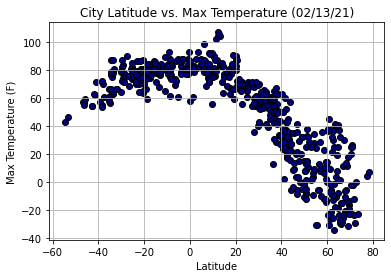

In [8]:
# Plotting the Data
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.

# LATITUDE VS. TEMPERATURE SCATTER PLOT

# Create a scatter plot for lattitude vs. temperature 
plt.scatter(weather_df["Latitude"], weather_df["Maximum Temperature"], facecolor = "navy", edgecolor = "black")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_files/Images/LatitudevsTemperature.png")
plt.show()

### The plot above describes the relationship between latitude and maximum temperature. It explains that when you reach closer to the equator of the earth which is latitude 0, the temperature gets hotter and hotter. 

## LATITUDE VS. HUMIDITY SCATTER PLOT

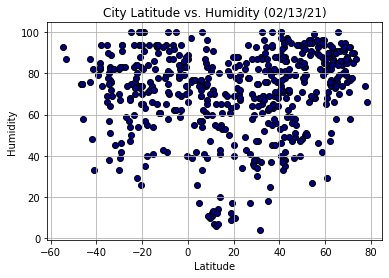

In [9]:
# Plotting the Data
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.

# LATITUDE VS. HUMIDITY SCATTER PLOT

# Create a scatter plot for lattitude vs. temperature 
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], facecolor = "navy", edgecolor = "black")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("output_files/Images/LatitudevsHumidity.png")
plt.show()

### The plot above describes the relationship between latitude and humidity. It explains that there is not much of a correlation between the relationship of latitude and humidity. 

## LATITUDE VS. CLOUDINESS SCATTER PLOT

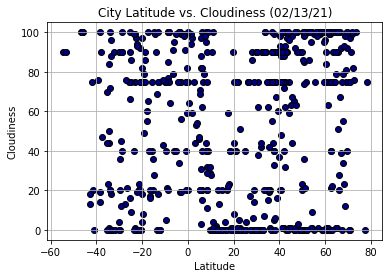

In [10]:
# Plotting the Data
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.

# LATITUDE VS. CLOUDINESS SCATTER PLOT

# Create a scatter plot for lattitude vs. temperature 
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], facecolor = "navy", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("output_files/Images/LatitudevsCloudiness.png")
plt.show()

### The plot above describes the relationship between latitude and cloudiness. It explains that there is not much correlation between the relationship of latitude and cloudiness.

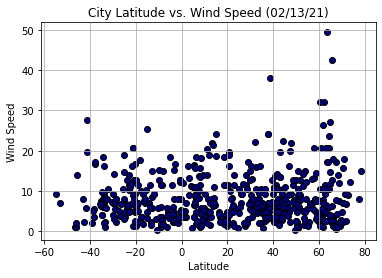

In [11]:
# Plotting the Data
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.

# LATITUDE VS. WIND SPEED SCATTER PLOT

# Create a scatter plot for lattitude vs. temperature 
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], facecolor = "navy", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("output_files/Images/LatitudevsWindspeed.png")
plt.show()

### The plot above describes the relationship between latitude and wind speed in mph. It explains that wind speeds are generally high when you are moving further away from the equation which is latitdue 0. 

## The second requirement is to run linear regression on each relationship. This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

### Northern Hemisphere - Temperature (F) vs. Latitude
### Southern Hemisphere - Temperature (F) vs. Latitude
### Northern Hemisphere - Humidity (%) vs. Latitude
### Southern Hemisphere - Humidity (%) vs. Latitude
### Northern Hemisphere - Cloudiness (%) vs. Latitude
### Southern Hemisphere - Cloudiness (%) vs. Latitude
### Northern Hemisphere - Wind Speed (mph) vs. Latitude
### Southern Hemisphere - Wind Speed (mph) vs. Latitude

## After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have.

In [12]:
# Create Northern and Southern Hemipshere DataFrame
data_regress = weather_df["Latitude"] > 0
northern_hemp = weather_df[data_regress]
southern_hemp = weather_df[data_regress]

southern_hemp = weather_df.loc[weather_df["Latitude"] < 0]

In [21]:
# LINEAR REGRESSION
# Create a function to create Linear Regression plots
# Define function for creating linear regression and scattor plot


def plot_linear_regression(x_values,y_values,x_label,y_label,x_ann,y_ann,label_pos,filename):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    print(f"The r-squared is : {rvalue}")
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_ann,y_ann),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(f"output_files/Images/{filename}")
    plt.show()

## Northern Hemisphere - Max Temp vs. Latitude Linear Regression


The r-squared is : -0.8897070477598891


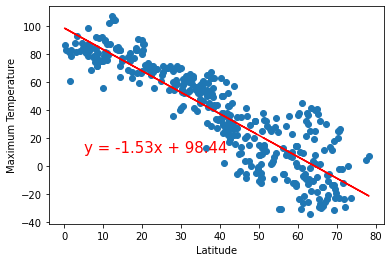

In [24]:
# Northern Hemisphere - Max Temperature (F) vs. Latitude Linear Regression

x_label = "Latitude"
y_label = "Maximum Temperature"
label_pos = (0,25)
plot_linear_regression(northern_hemp[x_label],northern_hemp[y_label],x_label,y_label,5,10,label_pos,"northhemp-maxtempvslatitude")

### The plot above describes the linear regression relationship between latitude and temperature in Northern Hemisphere. It explains that as you get closer to the equator at latitude 0, there is rise in temperature. It also shows that Northern Hemisphere seems to have an healthy one to one relationship.

## Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.5869961049828165


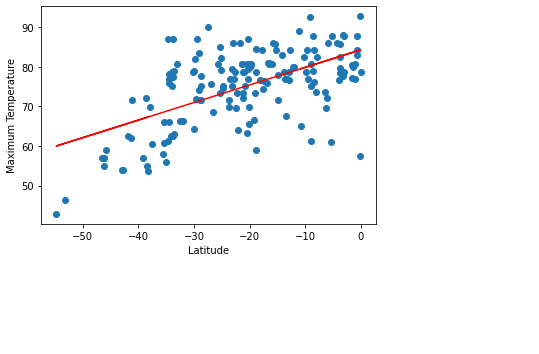

In [26]:
# Southern Hemisphere - Max Temperature (F) vs. Latitude Linear Regression

x_label = "Latitude"
y_label = "Maximum Temperature"
label_pos = (0,25)
plot_linear_regression(southern_hemp[x_label],southern_hemp[y_label],x_label,y_label,6,10,label_pos,"southhemp-maxtempvslatitude")

### The plot above describes the linear regression relationship between latitude and temperature in Southern Hemisphere. It explains that as you get closer to the equator at latitude 0, there is rise in temperature. 


### Looking at both graphs above between temperature and latitude in northern and southern hemisphere, it shows that there is inverse relationship between latitude and temperature between northern and southern hemisphere. Also there is a s trong correlation for both the hemispheres as well. 

### I had limitation on correcting my x_label to start from 0 to -50 from left to right. Instead it started with -50 and went to 0 from left to right. Which might not correlate the result I wanted to show in the graph.

## Northern Hemisphere - Humidity vs. Latitude Linear Regression

The r-squared is : 0.3888911781311015


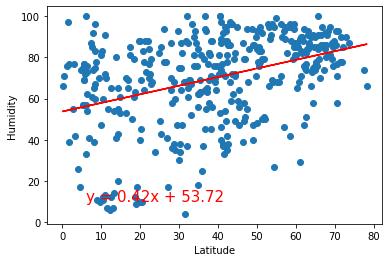

In [27]:
x_label = "Latitude"
y_label = "Humidity"
label_pos = (0,25)
plot_linear_regression(northern_hemp[x_label],northern_hemp[y_label],x_label,y_label,6,10,label_pos,"northhemp-maxtempvslatitude")

### The plot above describes the linear regression relationship between latitude and humidity in Northern Hemisphere. It explains that as you get further away from the equator, humidity increases.

## Southern Hemisphere - Humidity vs. Latitude Linear Regression

The r-squared is : 0.08493961121887109


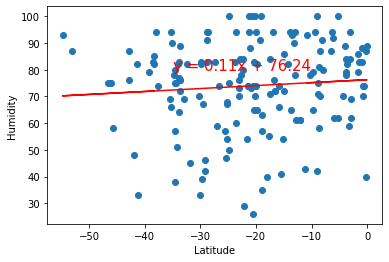

In [41]:
x_label = "Latitude"
y_label = "Humidity"
label_pos = (0,25)
plot_linear_regression(southern_hemp[x_label],southern_hemp[y_label],x_label,y_label,-35,80,label_pos,"southernhemp-humidvslatitude")

### The plot above describes the linear regression relationship between latitude and humidity in Southern Hemisphere. It explains that as you get further away from the equator, humidity decreases.

### Looking at both graphs above between humidity and latitude in northern and southern hemisphere, it shows strong correlation between humidity and latitude. The difference in correlation seems to be positive one in Northern Hemisphere and a negative one in Southern Hemisphere. The meaning of the correation is described for both graphs above, respectively. 

### I had limitation on correcting my x_label to start from 0 to -50 from left to right. Instead it started with -50 and went to 0 from left to right. Which might not correlate the result I wanted to show in the graph. 


## Northern Hemisphere - Cloudiness vs. Latitude Linear Regression

The r-squared is : 0.2819928666080328


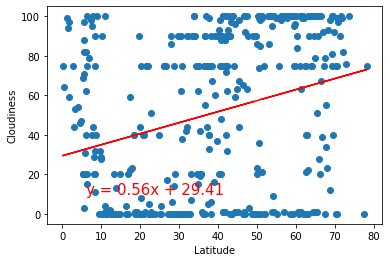

In [34]:
x_label = "Latitude"
y_label = "Cloudiness"
label_pos = (0,25)
plot_linear_regression(northern_hemp[x_label],northern_hemp[y_label],x_label,y_label,6,10,label_pos,"northernhemp-cloudvslatitude")

### The plot above describes the linear regression relationship between latitude and cloudiness in Northern Hemisphere. It explains that it is less cloudiness in the northern hemisphere since we are far away from the hemisphere. 

## Southern Hemisphere - Cloudiness vs. Latitude Linear Regression

The r-squared is : 0.13205762526354203


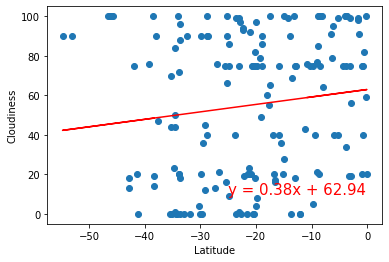

In [35]:
x_label = "Latitude"
y_label = "Cloudiness"
label_pos = (0,25)
plot_linear_regression(southern_hemp[x_label],southern_hemp[y_label],x_label,y_label,-25,10,label_pos,"southernhemp-cloudvslatitude")

### The plot above describes the linear regression relationship between latitude and cloudiness in Southern Hemisphere. It explains that since the southern hemisphere is close to the equator (latitude 0), if you are close to the equator there is more cloudiness compared to being further away such as in northern hemisphere. 

### Looking at both graphs above between temperature and humidity in northern and southern hemisphere, it shows strong correlation between humidity and latitude. The difference in correlation seems to be positive one in Northern Hemisphere and a negative one in Southern Hemisphere. The meaning of the correation is described for both graphs above, respectively.

## Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.04455562156540088


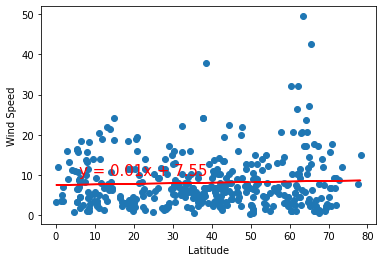

In [36]:
x_label = "Latitude"
y_label = "Wind Speed"
label_pos = (45,22)
plot_linear_regression(northern_hemp[x_label],northern_hemp[y_label],x_label,y_label,6,10,label_pos,"northernhemp-windspvslatitude")

### The plot above describes the linear regression relationship between latitude and wind speed (mph) in Northern Hemisphere. It explains that the further you are from the equator the higher the wind speed is. ¶

## Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.056813397502249154


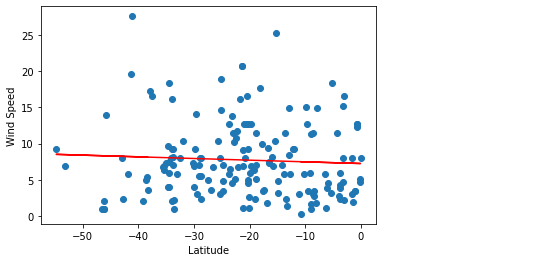

In [37]:
x_label = "Latitude"
y_label = "Wind Speed"
label_pos = (45,22)
plot_linear_regression(southern_hemp[x_label],southern_hemp[y_label],x_label,y_label,6,10,label_pos,"southernhemp-windspvslatitude")

### The plot above describes the linear regression relationship between latitude and wind speed (mph) in Southern Hemisphere. It explains that the further you are from the equator the higher the wind speed is.¶

### Looking at both plots above there seems to be pretty strong correlation between wind speed and latitude. The linear regression shows a much lower correlation than what you see. There is a definite correlation in both hemispheres. In both hemispheres, the further you are from the equator the higher the wind speeds are.

### I had limitation on correcting my x_label to start from 0 to -50 from left to right. Instead it started with -50 and went to 0 from left to right. Which might not correlate the result I wanted to show in the graph.

